In [361]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
import xgboost as xgb



In [286]:
# Read the file
df = pd.read_csv('C:/Users/chimi/Desktop/Python Data Science Projects/customer churn analysis/data/Churn.csv')

In [287]:
df.head(5)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [288]:
# Get a sense of structure and notice of different columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

In [289]:
# Look at the columns
df.columns

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'State', 'Area_Code',
       'Phone'],
      dtype='object')

In [290]:
# Data types
df.dtypes.value_counts()

int64      8
float64    8
object     5
Name: count, dtype: int64

In [291]:
# Check for duplicates
df.duplicated().sum()

0

In [292]:
# Check for missing values
df.isnull().sum()

Account_Length    0
Vmail_Message     0
Day_Mins          0
Eve_Mins          0
Night_Mins        0
Intl_Mins         0
CustServ_Calls    0
Churn             0
Intl_Plan         0
Vmail_Plan        0
Day_Calls         0
Day_Charge        0
Eve_Calls         0
Eve_Charge        0
Night_Calls       0
Night_Charge      0
Intl_Calls        0
Intl_Charge       0
State             0
Area_Code         0
Phone             0
dtype: int64

In [293]:
# Drop Area Code and Phone 

df.drop(columns=['Area_Code','Phone'], axis=1, inplace=True)

In [294]:

# What does the geographic distribution of the customer look like?
state_counts = df['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Customer_Count']

# Creating a choropleth map using Plotly
fig = px.choropleth(state_counts,locations='State',
                    locationmode='USA-states',
                    color='Customer_Count',
                   scope='usa',
                   title='Geographic Distribution of Customer Across State',
                   hover_name='State',
                   color_continuous_scale=px.colors.sequential.Blues)

fig.show()

In [295]:
# Check for duplicates
df.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000


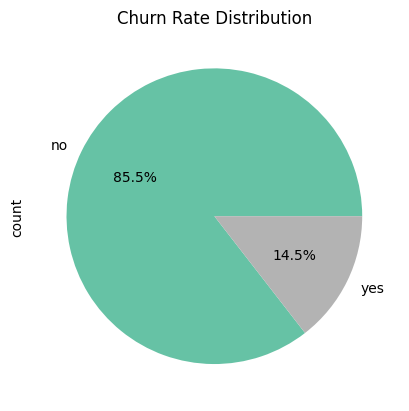

Churn
no     2850
yes     483
Name: count, dtype: int64


In [296]:
# How churners and non-churners does the dataset has?


# Define the colors for the pie chart
colors = ['#3498db', '#e74c3c']

# Create a pie chart to visualize churn rates

# Use value_counts to count the occurrences of each churn category
churn_counts = df['Churn'].value_counts()


# Plot the pie chart labels, autopct for percentage display, and specified colors 
churn_counts.plot.pie(labels=churn_counts.index, colormap='Set2', autopct='%1.1f%%')

# Add a title to the pie chart
plt.title('Churn Rate Distribution')

# Display the plot
plt.show()

print(churn_counts)

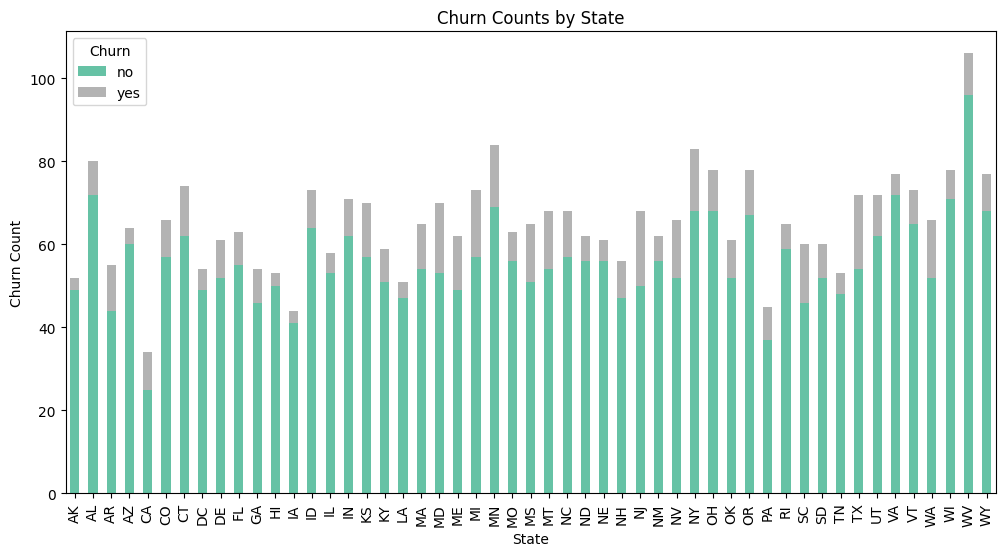

In [297]:
# Churn Rate by State
colors = ['#3498db', '#e74c3c']

churn_counts_by_state = df.groupby('State')['Churn'].value_counts().unstack().fillna(0)

# Create a bar chart for each state's churn counts
churn_counts_by_state.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')

# Add labels and a title
plt.xlabel('State')
plt.ylabel('Churn Count')
plt.title('Churn Counts by State')

# Show the legend
plt.legend(title='Churn', loc='upper left')

# Show the plot
plt.show()

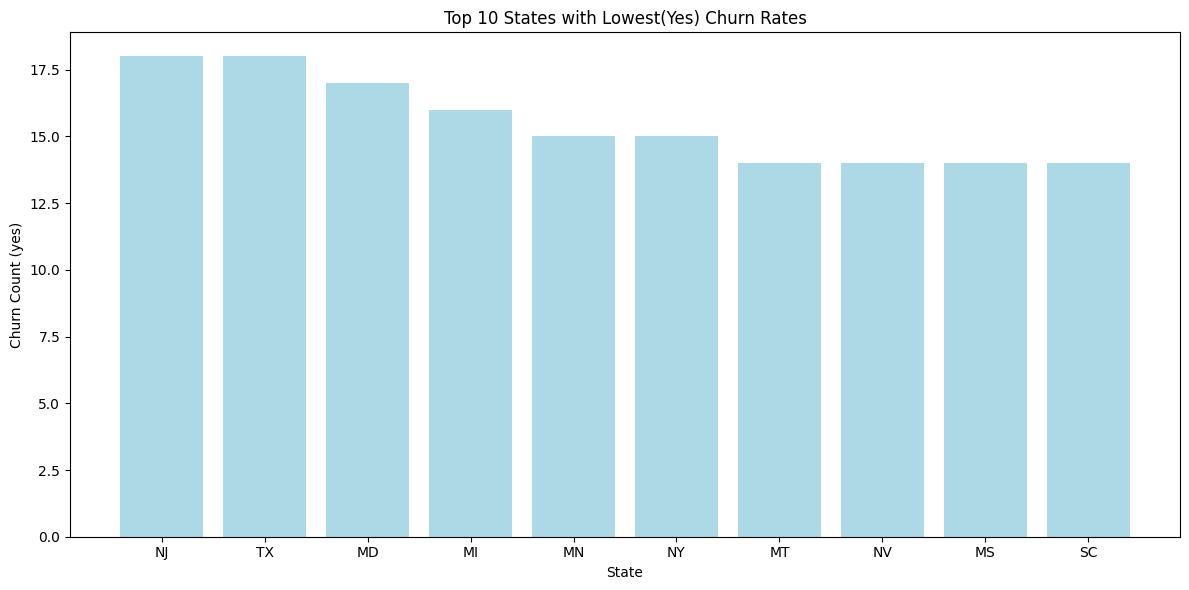

In [298]:
# What are the top 10 state with lowest non-retention rate?
churn_by_state = df.groupby('State')['Churn'].value_counts().unstack().reset_index()
churn_by_state = churn_by_state.rename_axis(None, axis=1)
churn_by_state = churn_by_state.rename(columns={'Churn': ''})
churn_by_state_sorted = churn_by_state.sort_values(by='yes',ascending=False).reset_index(drop=True)


top_10_churn_states = churn_by_state_sorted.head(10)

# Create a bar chart to visualize the top 10 states
plt.figure(figsize=(12,6))
plt.bar(top_10_churn_states['State'], top_10_churn_states['yes'], color='lightblue')
plt.xlabel('State')
plt.ylabel('Churn Count (yes)')
plt.title('Top 10 States with Lowest(Yes) Churn Rates')
plt.tight_layout()
plt.show()

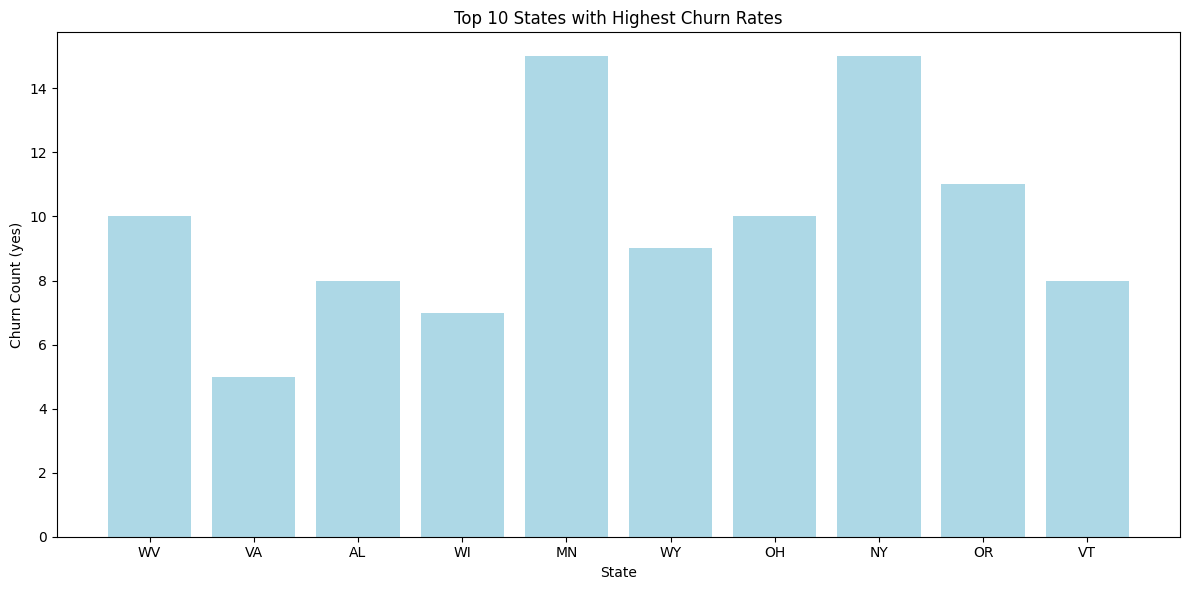

In [299]:
# What are the top 10 state with the highest retention rate?
churn_by_state_sorted = churn_by_state.sort_values(by='no',ascending=False).reset_index(drop=True)


top_10_churn_states = churn_by_state_sorted.head(10)

# Create a bar chart to visualize the top 10 states
plt.figure(figsize=(12,6))
plt.bar(top_10_churn_states['State'], top_10_churn_states['yes'], color='lightblue')
plt.xlabel('State')
plt.ylabel('Churn Count (yes)')
plt.title('Top 10 States with Highest Churn Rates')
plt.tight_layout()
plt.show()

In [300]:
# Maximum Number of customer retained 
churn_by_state[['State', 'yes']]

,State,yes
0,AK,3
1,AL,8
2,AR,11
3,AZ,4
4,CA,9
5,CO,9
6,CT,12
7,DC,5
8,DE,9
9,FL,8


In [301]:
# Maximum Number of Customer not retained 
churn_by_state[['State','no']].max()

State    WY
no       96
dtype: object

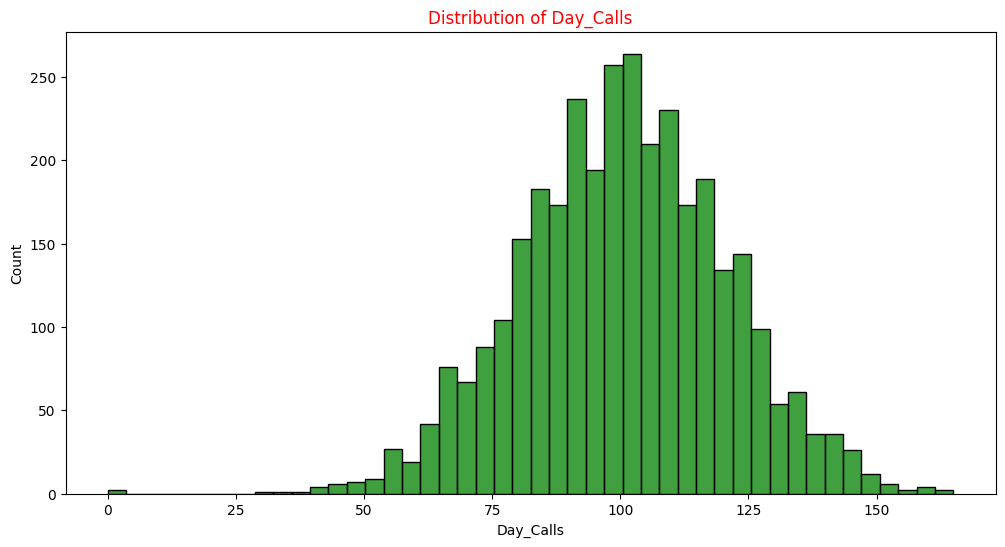

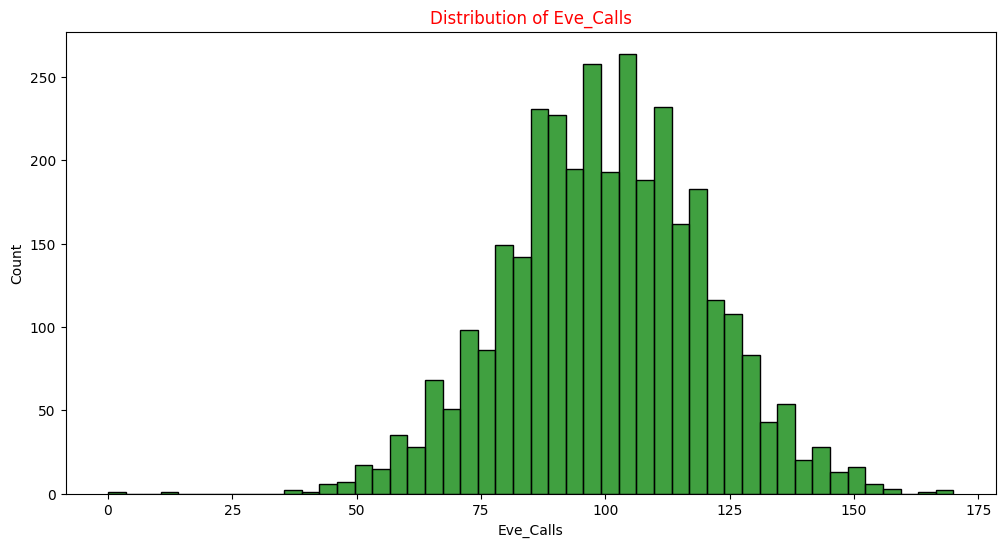

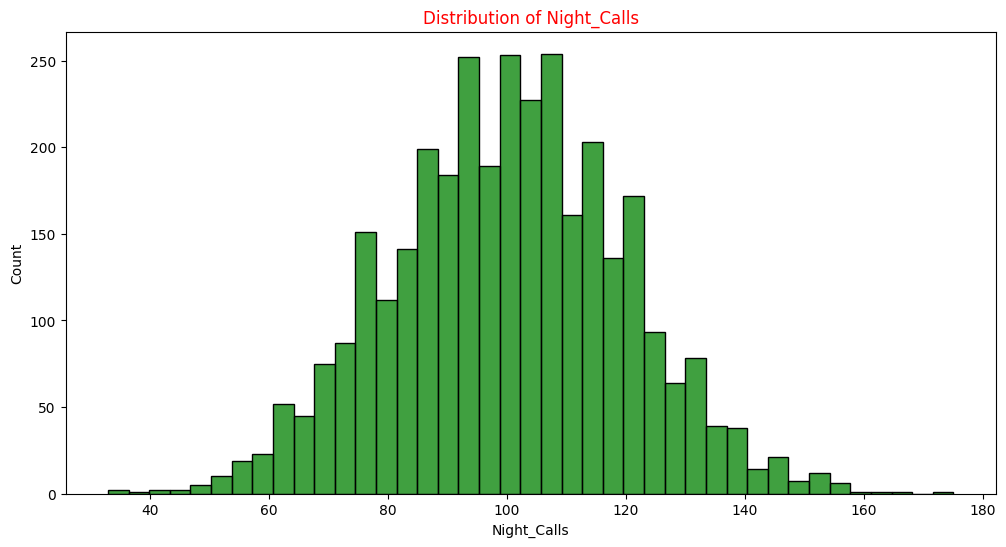

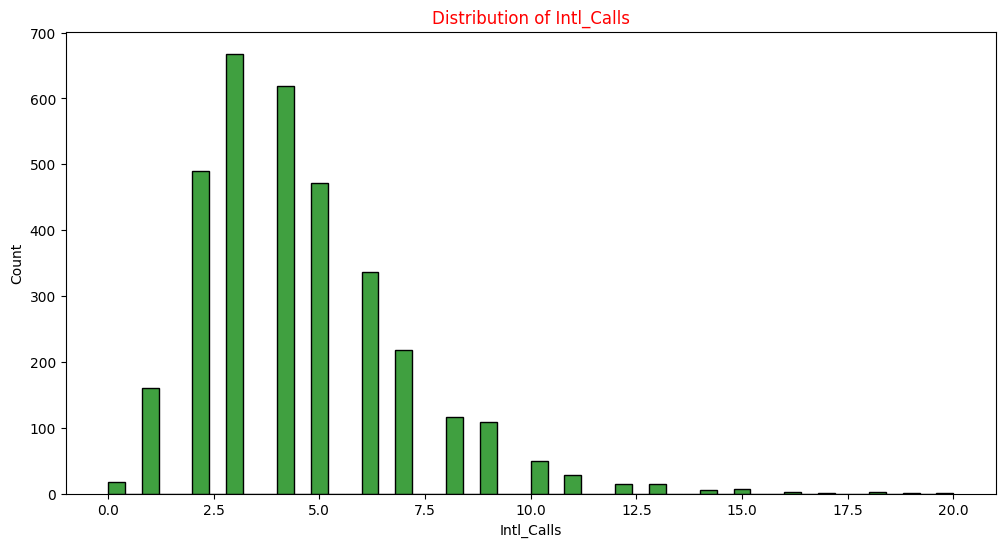

In [302]:
# Looking at calls 
calls = ['Day_Calls','Eve_Calls','Night_Calls','Intl_Calls']

for c in calls:
    plt.figure(figsize=(12,6))
    sns.histplot(df[c], color='green')
    plt.title(f'Distribution of {c}', color='red')

C:\Users\chimi\AppData\Local\Temp\ipykernel_7736\2237801736.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




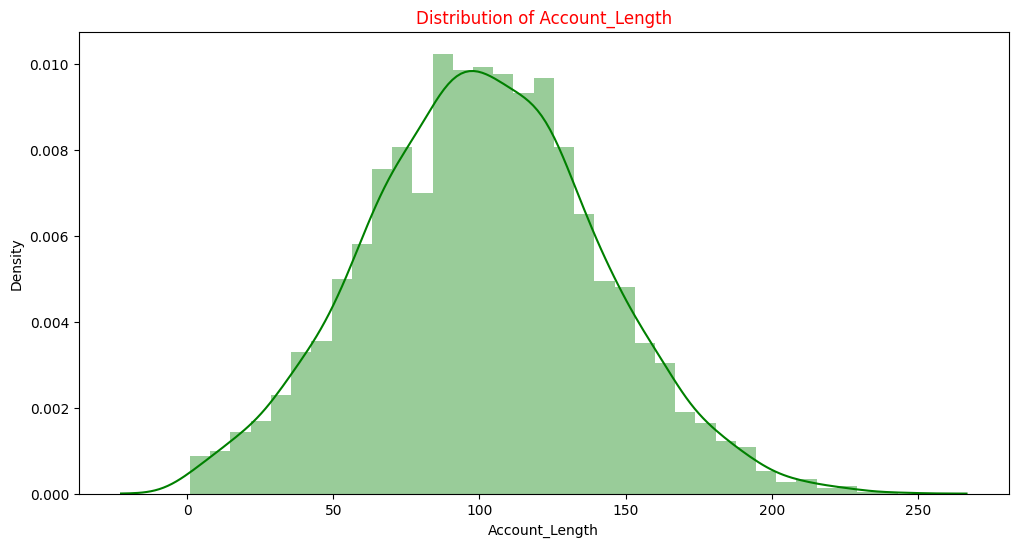

In [303]:
# Visualizing the distribution of account length

plt.figure(figsize=(12,6))
sns.distplot(df['Account_Length'],color='green')
plt.title('Distribution of Account_Length', color='red')
plt.show()




C:\Users\chimi\AppData\Local\Temp\ipykernel_7736\1519557211.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




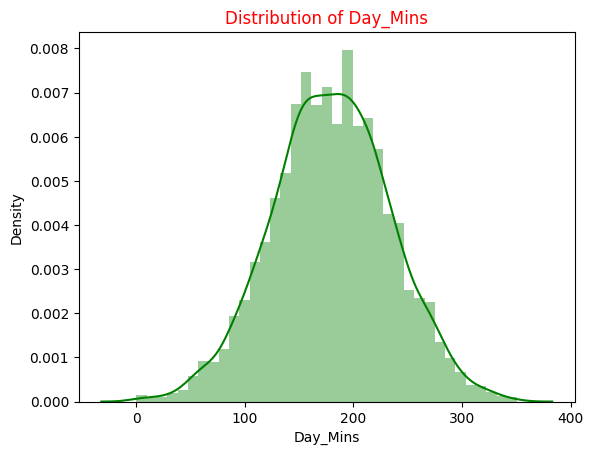

C:\Users\chimi\AppData\Local\Temp\ipykernel_7736\1519557211.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




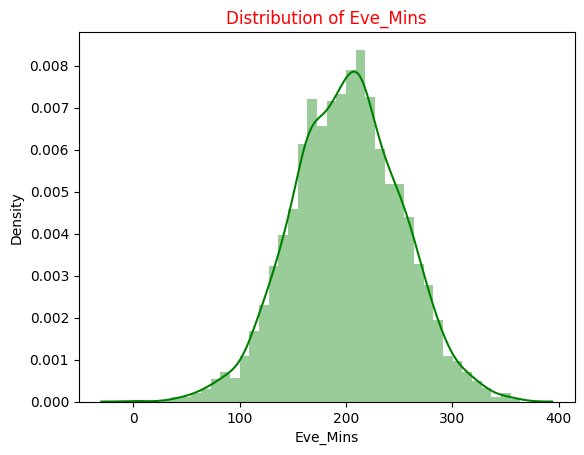

C:\Users\chimi\AppData\Local\Temp\ipykernel_7736\1519557211.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




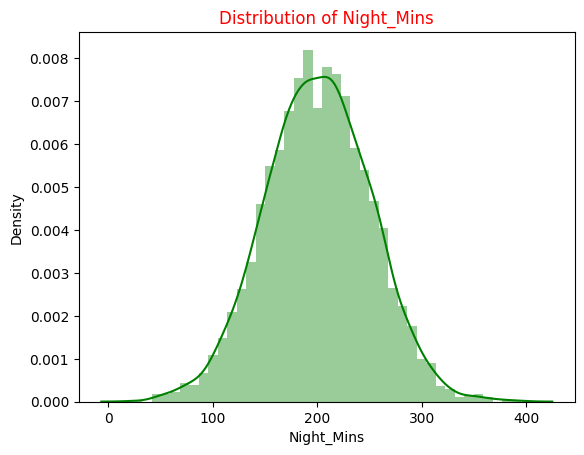

C:\Users\chimi\AppData\Local\Temp\ipykernel_7736\1519557211.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




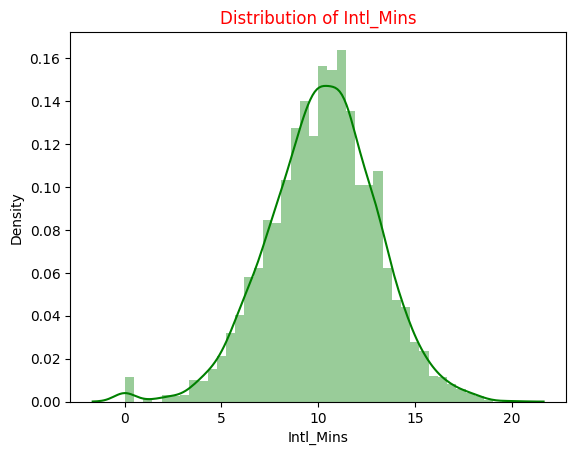

In [304]:
# Looking at the distribution of the minutes of the call
columns = ['Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins']

for i, cols in enumerate(columns):
    plt.figure(i)
    sns.distplot(df[cols], color='green')
    plt.title(f'Distribution of {cols}', color='red')
    plt.show()

C:\Users\chimi\AppData\Local\Temp\ipykernel_7736\1977316844.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




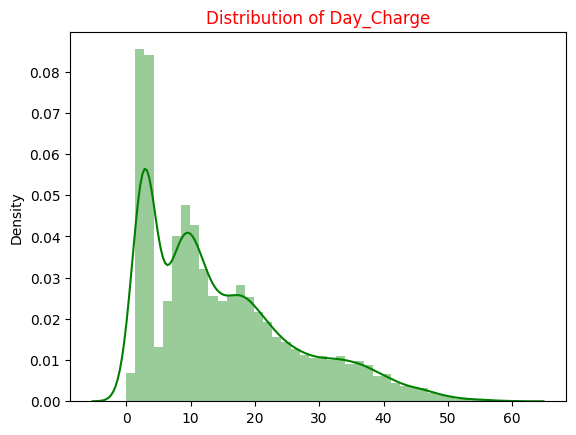

C:\Users\chimi\AppData\Local\Temp\ipykernel_7736\1977316844.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




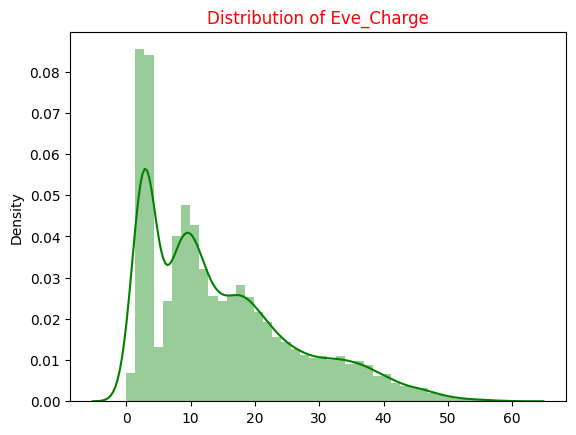

C:\Users\chimi\AppData\Local\Temp\ipykernel_7736\1977316844.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




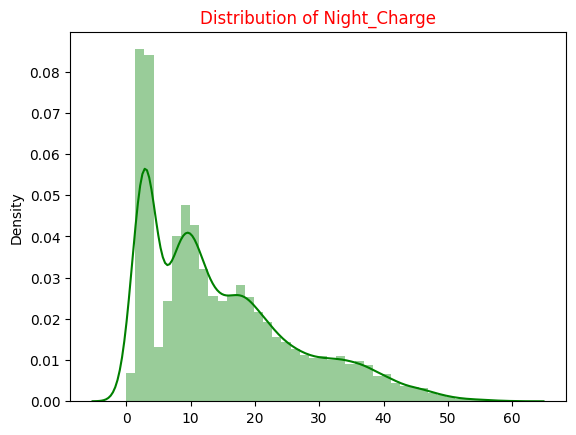

C:\Users\chimi\AppData\Local\Temp\ipykernel_7736\1977316844.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




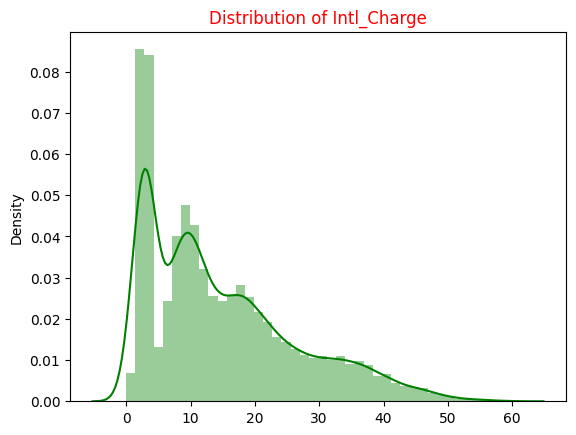

In [305]:

# Distribution of the Charges
charges = ['Day_Charge','Eve_Charge','Night_Charge','Intl_Charge']


for i, cols in enumerate(charges):
    plt.figure(i)
    sns.distplot(df[charges], color='green')
    plt.title(f'Distribution of {cols}', color='red')
    plt.show()


C:\Users\chimi\AppData\Local\Temp\ipykernel_7736\1948288325.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\chimi\AppData\Local\Temp\ipykernel_7736\1948288325.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




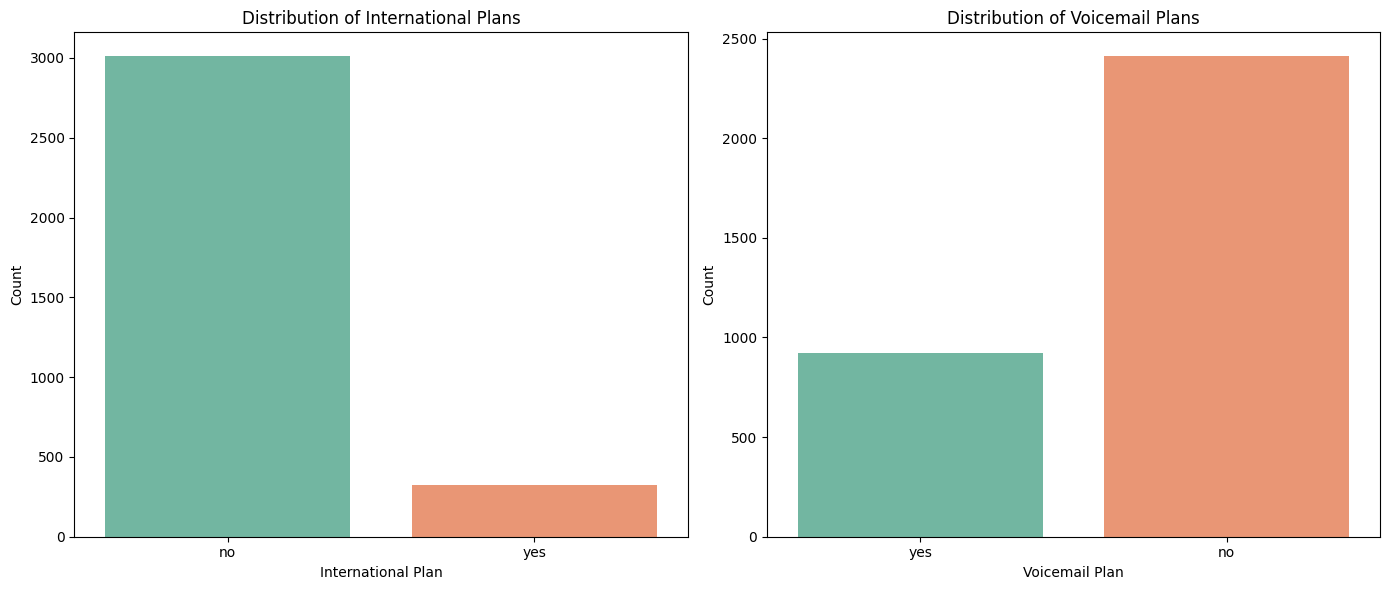

In [306]:
# Looking at the distribution of the plan

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Intl_Plan
sns.countplot(x='Intl_Plan', data=df, ax=axes[0], palette='Set2')
axes[0].set_title('Distribution of International Plans')
axes[0].set_xlabel('International Plan')
axes[0].set_ylabel('Count')

# Plot for Vmail_Plan
sns.countplot(x='Vmail_Plan', data=df, ax=axes[1], palette='Set2')
axes[1].set_title('Distribution of Voicemail Plans')
axes[1].set_xlabel('Voicemail Plan')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

### Exploring Bivariate Relationships

C:\Users\chimi\AppData\Local\Temp\ipykernel_7736\1927837438.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




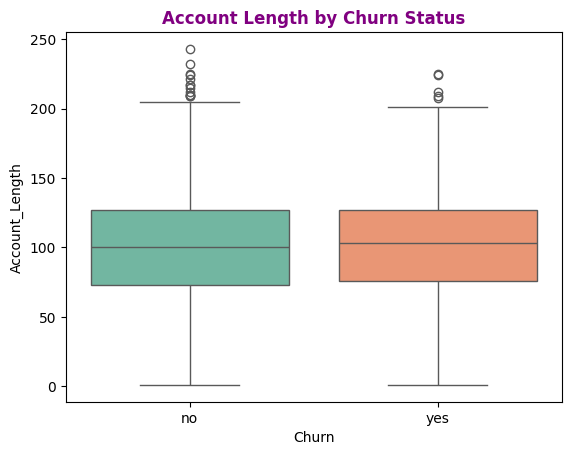

In [307]:
# Bivariate Relationships

# What was the account length of the customer by Churn Status?

# Difference in account length
sns.boxplot(x='Churn', y='Account_Length', data=df, palette='Set2')
plt.title('Account Length by Churn Status', color='purple', weight='bold')
plt.show()


<Figure size 1200x600 with 0 Axes>

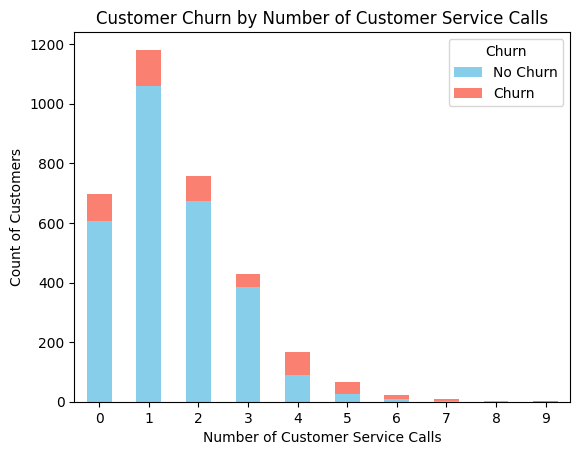

In [308]:
# How does the the number of customers service calls made by customer releate to their likelihood of churnig? 

custservice_call_count = df.groupby('CustServ_Calls')['Churn'].value_counts().unstack()

# Creating visualization for the above data
plt.figure(figsize=(12,6))
custservice_call_count.plot(kind='bar', stacked=True, color=['skyblue', 'salmon']) 
plt.title('Customer Churn by Number of Customer Service Calls')
plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Count of Customers')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.xticks(rotation=0)
plt.show()

Text(0, 0.5, 'Count')

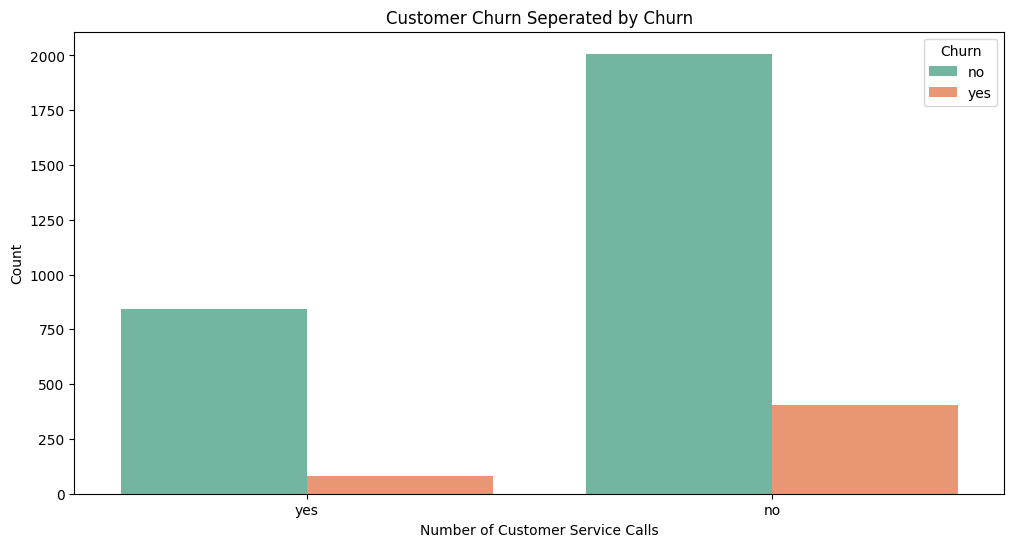

In [309]:
# How does the presence or absence of a voicemail plan influence the decision of customers to stay with or leave the service? 

# Creating visualization for the above data
plt.figure(figsize=(12,6))
sns.countplot(x='Vmail_Plan', hue='Churn', data=df, palette='Set2')
plt.title('Customer Churn Seperated by Churn')
plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Count')



Text(0, 0.5, 'Count')

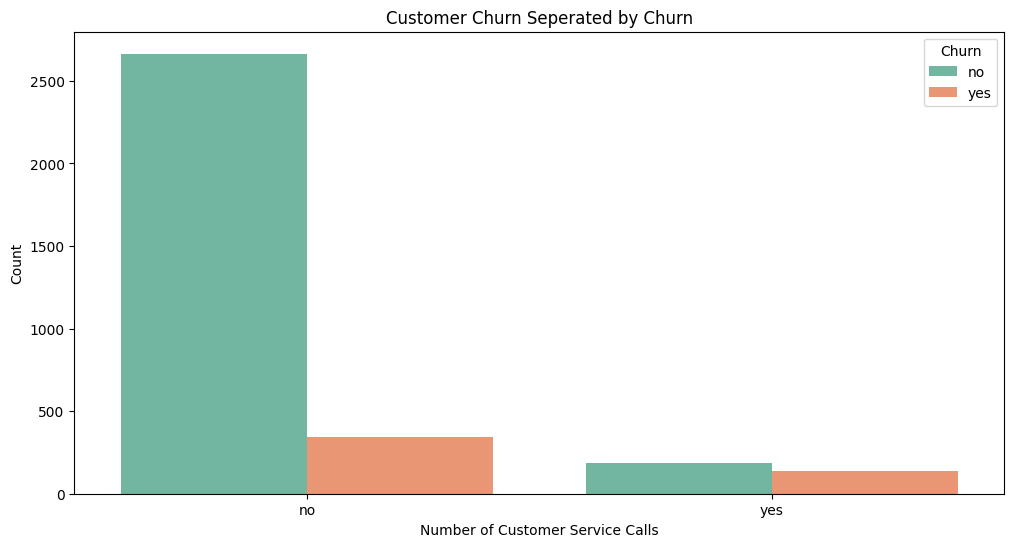

In [310]:
# How does the International plan subscription correlate with the likelihood of a customer churning?

# Creating visualization for the above data
plt.figure(figsize=(12,6))
sns.countplot(x='Intl_Plan', hue='Churn', data=df, palette='Set2')
plt.title('Customer Churn Seperated by Churn')
plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Count')


In [311]:
# Date Preprocessing
# Label Encode Yes or no 
df['Churn'] = df['Churn'].map({'no': 0, 'yes': 1})
df['Vmail_Plan'] = df['Vmail_Plan'].map({'no':0, 'yes':1})
df['Intl_Plan'] = df['Intl_Plan'].map({'no':0, 'yes':1})

In [312]:
# Drop the columns are not needed
df.drop(columns=['State'], inplace=True)

In [313]:
# Perform Some Feature Engineering

# Calculate total minutes by summing up Day, Evening, Night, and International minutes
df['Total_Mins'] = df['Day_Mins'] + df['Eve_Mins'] + df['Night_Mins'] + df['Intl_Mins']


#### Looking at total usage of minutes for customer who left the company and stayed

C:\Users\chimi\AppData\Local\Temp\ipykernel_7736\1162539859.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Minutes Usages by Churn Status')

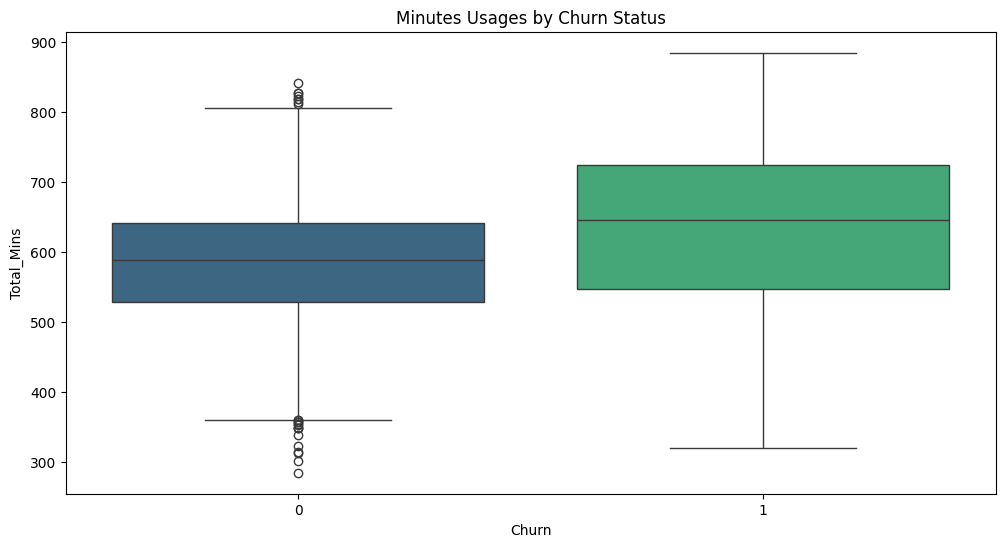

In [314]:
# How does the total number of usage of minutes differ by churn status?

plt.figure(figsize=(12,6))
sns.boxplot(x=df['Churn'], y=df['Total_Mins'], palette='viridis')
plt.title('Minutes Usages by Churn Status')

In [315]:
# Total Charge

# Calculate total charges by summing up Day, Evening, Night, and International charges
df['Total_Charges'] = df['Day_Charge'] + df['Eve_Charge'] + df['Night_Charge'] + df['Intl_Charge']

C:\Users\chimi\AppData\Local\Temp\ipykernel_7736\3704536763.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Minutes Usages by Churn Status')

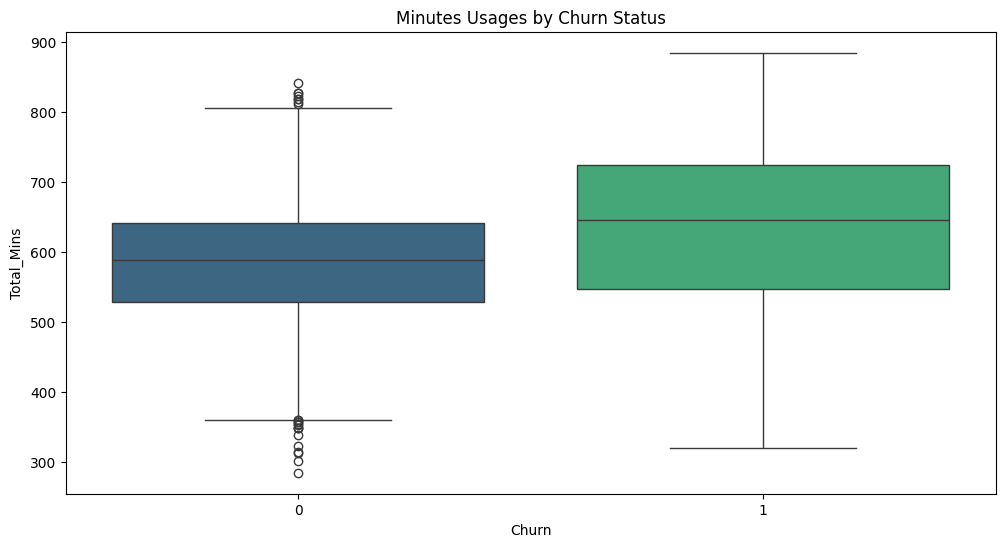

In [316]:
# How does charges vary by Churn Status? Does total charge have any saying in influencing customer leaving or staying?

plt.figure(figsize=(12,6))
sns.boxplot(x=df['Churn'], y=df['Total_Mins'], palette='viridis')
plt.title('Minutes Usages by Churn Status')

In [317]:

# Calculating Average Duration for different times of the day
df['Avg_Day_Call_Duration'] = df['Day_Mins'] / df['Day_Calls']
df['Avg_Eve_Call_Duration'] = df['Eve_Mins'] / df['Eve_Calls']
df['Avg_Night_Call_Duration'] = df['Night_Mins'] / df['Night_Calls']
df['Avg_Intl_Call_Duration'] = df['Intl_Mins'] / df['Intl_Calls']

# Displaying the first few rows to verify the new columns

In [318]:
df[['Avg_Day_Call_Duration', 'Avg_Eve_Call_Duration', 'Avg_Night_Call_Duration', 'Avg_Intl_Call_Duration']].head()


,Avg_Day_Call_Duration,Avg_Eve_Call_Duration,Avg_Night_Call_Duration,Avg_Intl_Call_Duration
0,2.410000,1.993939,2.689011,3.333333
1,1.313821,1.898058,2.469903,4.566667
2,2.135088,1.101818,1.563462,2.440000
3,4.216901,0.703409,2.212360,0.942857
4,1.475221,1.215574,1.544628,3.366667


In [319]:
# Calculate Cost per minue for different times of the day

df['Day_Cost_per_Minute'] = df['Day_Charge'] / df['Day_Mins']
df['Eve_Cost_per_Minute'] = df['Eve_Charge'] / df['Eve_Mins']
df['Night_Cost_per_Minute'] = df['Night_Charge'] / df['Night_Mins']
df['Intl_Cost_per_Minute'] = df['Intl_Charge'] / df['Intl_Mins']


# Displaying the first few rows to verify the new columns
df[['Day_Cost_per_Minute', 'Eve_Cost_per_Minute', 'Night_Cost_per_Minute', 'Intl_Cost_per_Minute']].head()

,Day_Cost_per_Minute,Eve_Cost_per_Minute,Night_Cost_per_Minute,Intl_Cost_per_Minute
0,0.170011,0.085005,0.044994,0.270000
1,0.169988,0.085013,0.045008,0.270073
2,0.170008,0.084983,0.045018,0.269672
3,0.170007,0.084976,0.044997,0.269697
4,0.170006,0.085030,0.044997,0.270297


In [320]:
# Proportion to total charge


# Calculating the proportion of total charge attributed to different times of the day
df['Day_Cost_Prop'] = df['Day_Charge'] / df['Total_Charges']
df['Eve_Cost_Prop'] = df['Eve_Charge'] / df['Total_Charges']
df['Night_Cost_Prop'] = df['Night_Charge'] / df['Total_Charges']
df['Intl_Cost_Prop'] = df['Intl_Charge'] / df['Total_Charges']

# Displaying the first few rows to verify the new columns
df[['Day_Cost_Prop', 'Eve_Cost_Prop', 'Night_Cost_Prop', 'Intl_Cost_Prop']].head()


,Day_Cost_Prop,Eve_Cost_Prop,Night_Cost_Prop,Intl_Cost_Prop
0,0.596480,0.222075,0.145712,0.035733
1,0.463707,0.280554,0.193282,0.062458
2,0.664312,0.165356,0.117515,0.052817
3,0.761976,0.078743,0.132635,0.026647
4,0.544058,0.242081,0.161451,0.052409


In [321]:
# Check for missing values
df.isnull().sum()

Account_Length              0
Vmail_Message               0
Day_Mins                    0
Eve_Mins                    0
Night_Mins                  0
Intl_Mins                   0
CustServ_Calls              0
Churn                       0
Intl_Plan                   0
Vmail_Plan                  0
Day_Calls                   0
Day_Charge                  0
Eve_Calls                   0
Eve_Charge                  0
Night_Calls                 0
Night_Charge                0
Intl_Calls                  0
Intl_Charge                 0
Total_Mins                  0
Total_Charges               0
Avg_Day_Call_Duration       2
Avg_Eve_Call_Duration       1
Avg_Night_Call_Duration     0
Avg_Intl_Call_Duration     18
Day_Cost_per_Minute         2
Eve_Cost_per_Minute         1
Night_Cost_per_Minute       0
Intl_Cost_per_Minute       18
Day_Cost_Prop               0
Eve_Cost_Prop               0
Night_Cost_Prop             0
Intl_Cost_Prop              0
dtype: int64

In [322]:
# Impute missing values
df['Avg_Day_Call_Duration'].fillna(df['Avg_Day_Call_Duration'].mean(), inplace=True)
df['Avg_Eve_Call_Duration'].fillna(df['Avg_Eve_Call_Duration'].mean(), inplace=True)
df['Intl_Cost_per_Minute'].fillna(df['Intl_Cost_per_Minute'].mean(), inplace=True)
df['Avg_Intl_Call_Duration'].fillna(df['Avg_Intl_Call_Duration'].mean(), inplace=True)
df['Day_Cost_per_Minute'].fillna(df['Day_Cost_per_Minute'].mean(), inplace=True)
df['Eve_Cost_per_Minute'].fillna(df['Eve_Cost_per_Minute'].mean(), inplace=True)

# Verify the missing values
df.isnull().sum().sum()

C:\Users\chimi\AppData\Local\Temp\ipykernel_7736\1357987312.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\chimi\AppData\Local\Temp\ipykernel_7736\1357987312.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

0

In [323]:
# Splitting the dataset into features and target variable
X = df.drop(columns=['Churn'])
y = df['Churn']

In [324]:
# Split the dataset into training and Testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [325]:
# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [326]:
# Logistic Regression Model
def train_evaluate_logistic_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, roc_auc, report


# Logistic Regression
logistic_regression = LogisticRegression(random_state=42)
lr_accuracy, lr_roc_auc, lr_report = train_evaluate_model(logistic_regression, X_train, X_test, y_train, y_test)

# Decision Tree
decision_tree

DecisionTreeClassifier(random_state=42)

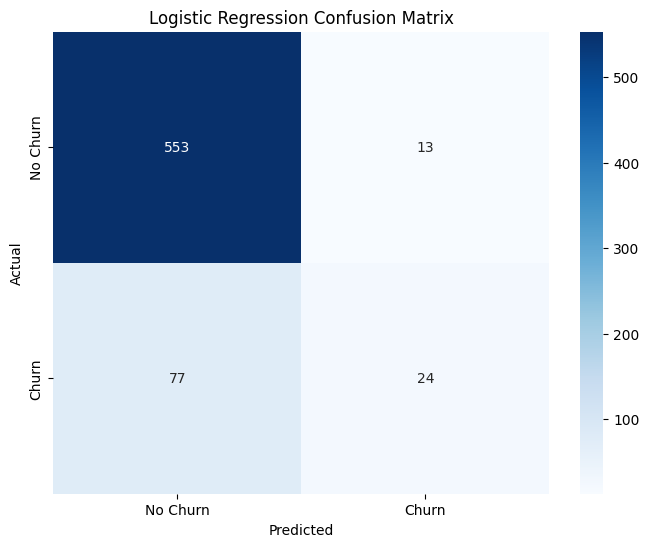

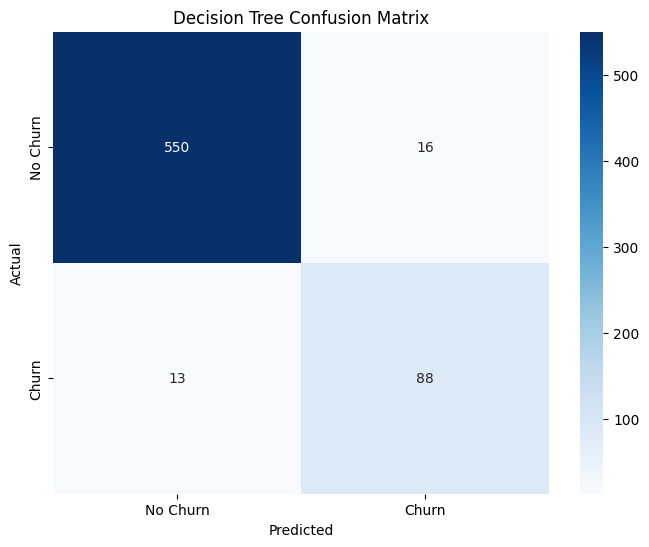

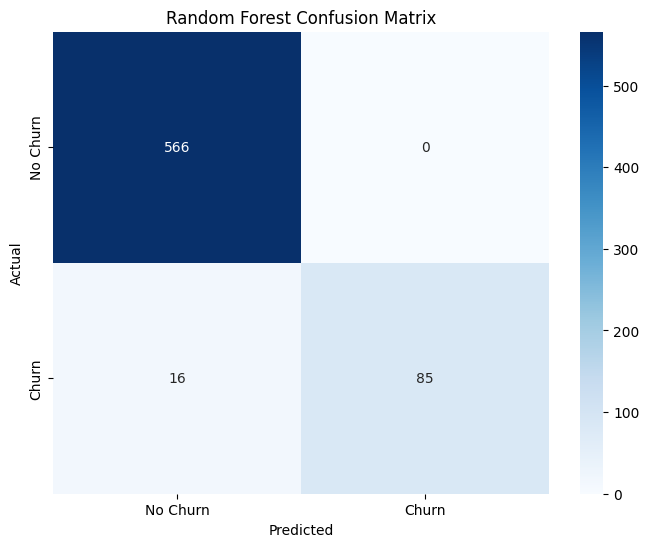

Logistic Regression:
Accuracy: 0.87
ROC-AUC: 0.61
              precision    recall  f1-score   support

           0       0.88      0.98      0.92       566
           1       0.65      0.24      0.35       101

    accuracy                           0.87       667
   macro avg       0.76      0.61      0.64       667
weighted avg       0.84      0.87      0.84       667


Decision Tree:
Accuracy: 0.96
ROC-AUC: 0.92
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       566
           1       0.85      0.87      0.86       101

    accuracy                           0.96       667
   macro avg       0.91      0.92      0.92       667
weighted avg       0.96      0.96      0.96       667


Random Forest:
Accuracy: 0.98
ROC-AUC: 0.92
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       566
           1       1.00      0.84      0.91       101

    accuracy                           0.9

In [335]:
# Logistic Regression,Decision Tree, Random Forest
def train_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, roc_auc, report, y_pred


def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()


# Logistic Regression
logistic_regression = LogisticRegression(random_state=42)
lr_accuracy, lr_roc_auc, lr_report, lr_y_pred = train_evaluate_model(logistic_regression, X_train, X_test, y_train, y_test)
plot_confusion_matrix(y_test, lr_y_pred, title='Logistic Regression Confusion Matrix')

# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
dt_accuracy, dt_roc_auc, dt_report, dt_y_pred = train_evaluate_model(decision_tree, X_train, X_test, y_train, y_test)
plot_confusion_matrix(y_test, dt_y_pred, title='Decision Tree Confusion Matrix')

# Random Forest
random_forest = RandomForestClassifier(random_state=42)
rf_accuracy, rf_roc_auc, rf_report, rf_y_pred = train_evaluate_model(random_forest, X_train, X_test, y_train, y_test)
plot_confusion_matrix(y_test, rf_y_pred, title='Random Forest Confusion Matrix')


# Print results for Logistic Regression
print("Logistic Regression:")
print(f"Accuracy: {lr_accuracy:.2f}")
print(f"ROC-AUC: {lr_roc_auc:.2f}")
print(lr_report)

# Print results for Decision Tree
print("\nDecision Tree:")
print(f"Accuracy: {dt_accuracy:.2f}")
print(f"ROC-AUC: {dt_roc_auc:.2f}")
print(dt_report)

# Print results for Random Forest
print("\nRandom Forest:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"ROC-AUC: {rf_roc_auc:.2f}")
print(rf_report)

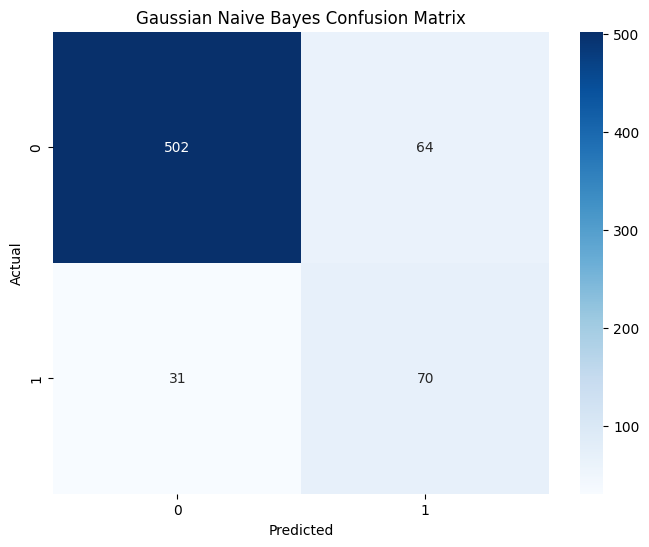

Gaussian Naive Bayes:
Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       566
           1       0.52      0.69      0.60       101

    accuracy                           0.86       667
   macro avg       0.73      0.79      0.75       667
weighted avg       0.88      0.86      0.87       667



In [355]:
# Function to Train and Evaluate Naive Bayes Model
def naive_bayes(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return y_pred, accuracy, report

# Function to Plot Confusion Matrix
def plot_confusion_matrix(y_test, y_pred,  title='Confusion Matrix'):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Train and Evaluate Gaussian Naive Bayes
gnb = GaussianNB()
y_pred_gnb, accuracy_gnb, report_gnb = naive_bayes(gnb, X_train, X_test, y_train, y_test)
plot_confusion_matrix(y_test, y_pred_gnb,  title='Gaussian Naive Bayes Confusion Matrix')

# Print Results for Gaussian Naive Bayes
print("Gaussian Naive Bayes:")
print(f"Accuracy: {accuracy_gnb:.2f}")
print(report_gnb)

C:\Users\chimi\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



ROC-AUC: 0.94
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       566
           1       1.00      0.87      0.93       101

    accuracy                           0.98       667
   macro avg       0.99      0.94      0.96       667
weighted avg       0.98      0.98      0.98       667



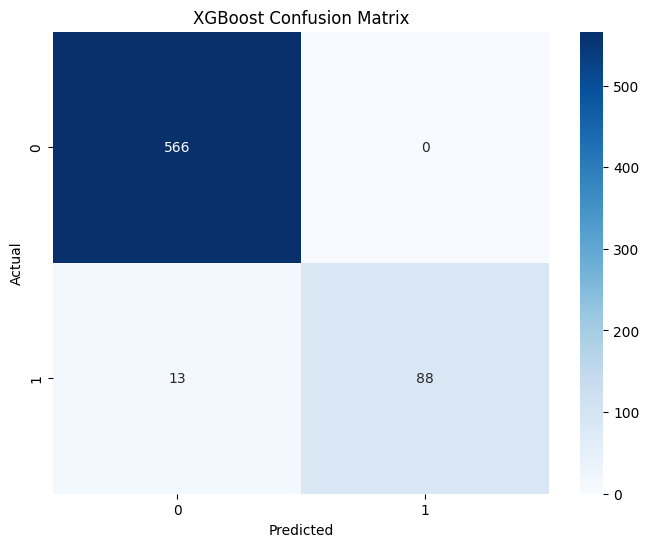

In [367]:
# XG Boost Tutorial

def XGBOOST(model, X_train, X_test, y_train, y_test):
    model = xgb.XGBClassifier().fit(X_train, y_train)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return y_pred, roc_auc, report
    
def plot_confusion_matrix(y_test, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

y_pred, roc_auc, report = XGBOOST(model, X_train, X_test, y_train, y_test)

# Print evaluation results
print(f"ROC-AUC: {roc_auc:.2f}")
print(report)

# Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred, title='XGBoost Confusion Matrix')


In [ ]:
# Random Forest-highest accuracy, strong ROC-AUC, 